In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense,Flatten, Dropout,Input
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
dataset = pd.read_csv("creditcard.csv")
# Display basic information about the dataset
print(dataset.head())
print(dataset.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [9]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [3]:
# Check for null values
print("Any nulls in the dataset:", dataset.isnull().values.any())

# Scale the 'Time' and 'Amount' columns
scaler = StandardScaler()
dataset['Time'] = scaler.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1, 1))

# Split data into features and labels
data = dataset.drop(['Class'], axis=1)
labels = dataset['Class']

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=2021)


Any nulls in the dataset: False


In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [21]:
# Encoder layers
input_layer = Input(shape=(30,))
encoder = Dense(14, activation="tanh")(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(7, activation="relu")(encoder)

# Decoder layers
decoder = Dense(14, activation="relu")(encoder)
decoder = Dropout(0.2)(decoder)
decoder = Dense(input_dim, activation="tanh")(decoder)

# Define the Autoencoder model
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,101 (4.30 KB)

 Trainable params: 1,101 (4.30 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
input_dim 

30

In [5]:
# Compile the model
autoencoder.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])


In [6]:
# Train the Autoencoder on normal data
history = autoencoder.fit(
    train_data[train_labels == 0], train_data[train_labels == 0],  # Normal transactions only
    epochs=50,
    batch_size=64,
    validation_data=(test_data, test_data),
    shuffle=True
)


Epoch 1/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.3152 - loss: 0.8821 - val_accuracy: 0.4450 - val_loss: 0.7493
Epoch 2/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3977 - loss: 0.7774 - val_accuracy: 0.4418 - val_loss: 0.7249
Epoch 3/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3869 - loss: 0.7564 - val_accuracy: 0.4667 - val_loss: 0.6930
Epoch 4/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3847 - loss: 0.7319 - val_accuracy: 0.4522 - val_loss: 0.6788
Epoch 5/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3725 - loss: 0.7323 - val_accuracy: 0.4201 - val_loss: 0.6734
Epoch 6/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3571 - loss: 0.7350 - val_accuracy: 0.4069 - val_loss: 0.6716
Epoch 7/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3486 - loss: 0.7162 - val_accuracy: 0.4177 - val_loss: 0.6721
Epoch 8/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3515 - loss: 0.

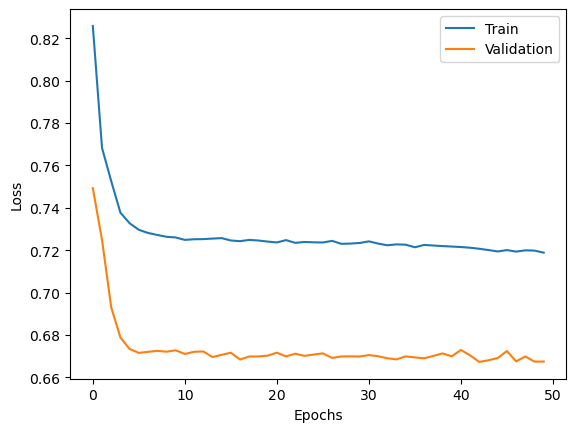

In [7]:

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


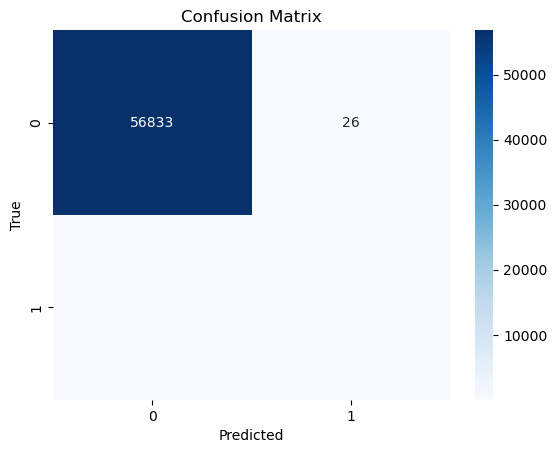

Accuracy: 0.998139110284049
Recall: 0.22330097087378642
Precision: 0.46938775510204084


In [8]:
# Predict and calculate reconstruction error
test_predictions = autoencoder.predict(test_data)
reconstruction_error = np.mean(np.power(test_data - test_predictions, 2), axis=1)

# Set a threshold for anomalies
threshold = 52  # Adjust based on observations

# Label as fraud if the reconstruction error exceeds the threshold
pred_labels = [1 if error > threshold else 0 for error in reconstruction_error]

# Confusion matrix to evaluate performance
conf_matrix = confusion_matrix(test_labels, pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print metrics
print("Accuracy:", accuracy_score(test_labels, pred_labels))
print("Recall:", recall_score(test_labels, pred_labels))
print("Precision:", precision_score(test_labels, pred_labels))
